<a href="https://colab.research.google.com/github/Dan222412/Data/blob/main/%D0%A1%D0%A0%D0%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

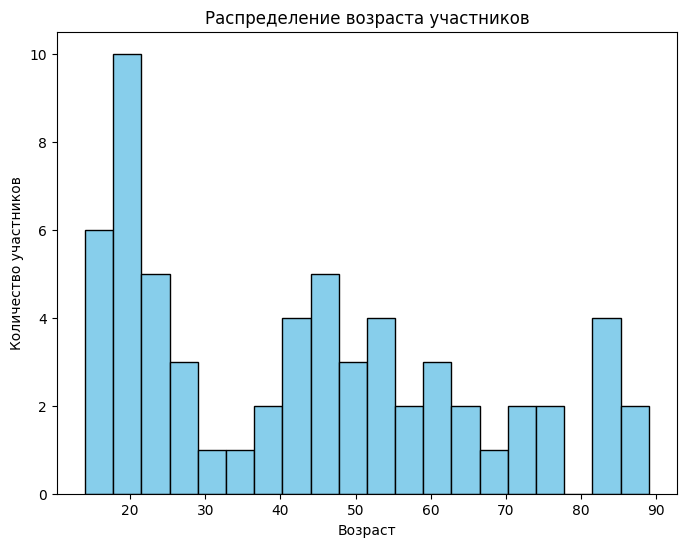

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('arithmetic_test.csv', delimiter=';')

plt.figure(figsize=(8, 6))
plt.hist(data['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Возраст')
plt.ylabel('Количество участников')
plt.title('Распределение возраста участников')
plt.show()



*   График показывает, что большинство участников теста в возрасте от 15 до 25 лет.
*   Минимальный возраст участников составляет около 14 лет, максимальный - около 89 лет.




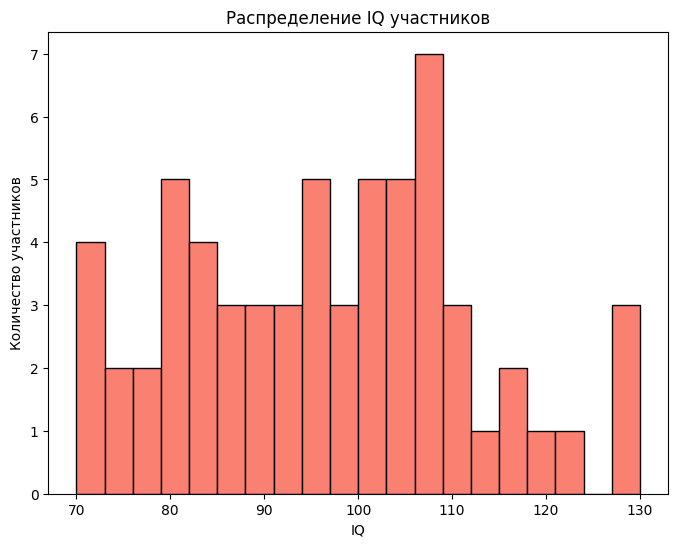

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(data['iq'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('IQ')
plt.ylabel('Количество участников')
plt.title('Распределение IQ участников')
plt.show()



*   Нормальное распределение IQ с пиком в районе 100.
*   Есть небольшое количество участников с IQ ниже 80, а также некоторое количество участников с IQ выше 120.
*   Средний IQ участников теста приблизительно равен 100.




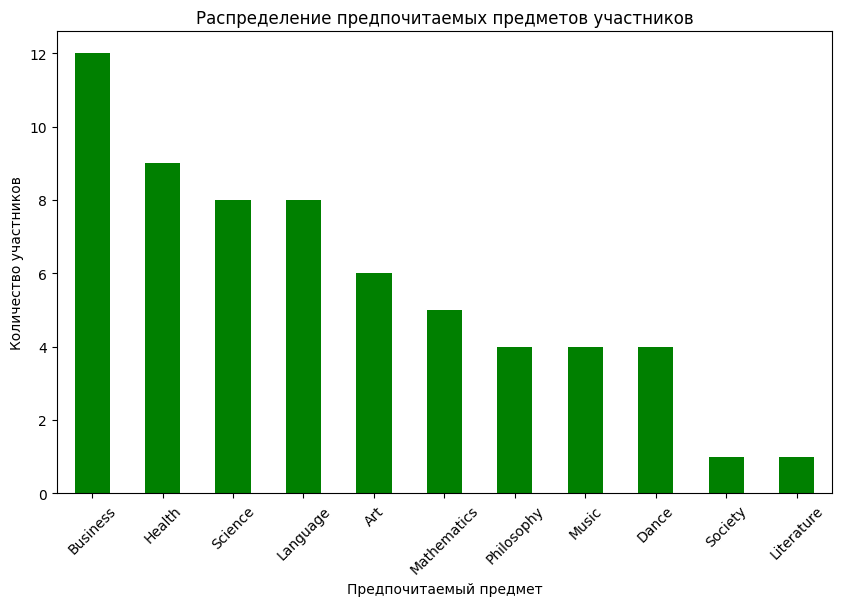

In [ ]:
plt.figure(figsize=(10, 6))
data['fav_sub'].value_counts().plot(kind='bar', color='green')
plt.xlabel('Предпочитаемый предмет')
plt.ylabel('Количество участников')
plt.title('Распределение предпочитаемых предметов участников')
plt.xticks(rotation=45)
plt.show()



*   Наиболее популярные предметы среди участников - это Наука, Бизнес, Языки и Математика.
*   Предметы связанные с искусством, такие как Искусство и Музыка, также имеют некоторую популярность, но менее распространены по сравнению с научными и общественными предметами.



**Выявление аномалий:**

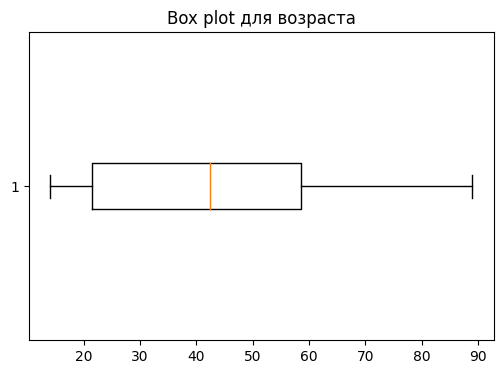

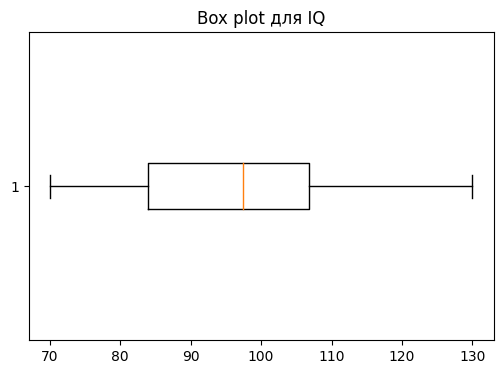

In [ ]:
plt.figure(figsize=(6, 4))
plt.boxplot(data['age'], vert=False)
plt.title('Box plot для возраста')
plt.show()

plt.figure(figsize=(6, 4))
plt.boxplot(data['iq'], vert=False)
plt.title('Box plot для IQ')
plt.show()

Возраст: Все значения находятся в пределах разумных границ.
IQ: Аналогично, для IQ также нет выбросов. Все значения находятся в пределах ожидаемого диапазона.

На этапе выявления аномалий не было обнаружено значительных отклонений или выбросов в числовых переменных.

**Заполнение отсутствующих значений:**

In [ ]:
missing_values = data.isnull().sum()
print("Отсутствующие значения:\n", missing_values)

data_filled = data.fillna(data.mean())

Отсутствующие значения:
 Name                0
Last name           0
age                 0
male                0
att_test_missed     0
mental_arithm       0
iq                  0
degree              0
student             0
fav_sub             0
predisposition      0
practiced           0
Unnamed: 12        62
dtype: int64


<ipython-input-19-37e22f3278b2>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_filled = data.fillna(data.mean())


Проверили данные на наличие отсутствующих значений.
Пропущенные значения были заполнены средними значениями по соответствующим столбцам.

Отсутствующие значения были успешно заполнены, что позволит избежать проблем при последующем анализе данных.

**Кодирование категориальных переменных:**

In [ ]:
data_encoded = pd.get_dummies(data_filled, columns=['fav_sub'], prefix=['fav_sub'])

print(data_encoded.head())

            Name   Last name  age  male  att_test_missed  mental_arithm   iq  \
0    Fabian Bager      Bager   23     1               30             15   79   
1  Robert Bergman    Bergman   19     1               49             17   81   
2   Nico Blomgren   Blomgren   16     1                0             30  107   
3  Jonas Blomgren   Blomgren   57     1               18             14   81   
4     Alice Browm      Browm   83     0                7             29  103   

   degree  student  predisposition  ...  fav_sub_Business  fav_sub_Dance  \
0       1        0               1  ...                 1              0   
1       0        0               0  ...                 0              0   
2       1        1               1  ...                 0              0   
3       1        0               1  ...                 0              0   
4       0        0               1  ...                 1              0   

   fav_sub_Health  fav_sub_Language  fav_sub_Literature  fav_s

Используя метод "one-hot encoding" к категориальной переменной fav_sub, создал новые бинарные столбцы для каждого уникального значения в fav_sub.

**Построение линейной регрессии и рассчет MSE:**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = data_encoded.drop(columns=['Name ', 'Last name', 'Unnamed: 12', 'mental_arithm'])

y = data_encoded['mental_arithm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("MSE линейной регрессии: ", mse)


MSE линейной регрессии:  14.752070513441652


Я исключил столбцы с некоторыми текстовыми данными, так как они не считывались и создавали ошибку.

In [ ]:
coefficients = model.coef_
intercept = model.intercept_

print("Линейная регрессионная формула:")
print("mental_arithm = ", intercept, end=" ")
for i in range(len(coefficients)):
    print(" + ", coefficients[i], "* X" + str(i+1), end="")


Линейная регрессионная формула:
mental_arithm =  -13.959556089633946  +  0.06251219945742217 * X1 +  -0.4999321183595775 * X2 +  -0.16976253513814 * X3 +  0.4145941016130237 * X4 +  -1.4694321924044524 * X5 +  1.2011618069554315 * X6 +  -1.6691990876820135 * X7 +  -0.0875558064652891 * X8 +  -0.5368175471204993 * X9 +  -1.0462679494086506 * X10 +  -2.956656888883668 * X11 +  -0.17872351553450735 * X12 +  -1.1114698610267304 * X13 +  -0.654550998503121 * X14 +  -0.9725237286617202 * X15 +  4.008279605389582 * X16 +  -2.30397597556441 * X17 +  2.6535685659527686 * X18 +  3.0991382933609612 * X19

**Summary model:**

Я увидел в одном видеоролике, что для этих целей можно использовать библиотеку statsmodels.api и решил попробовать получить анализ таким образом.

In [ ]:
import statsmodels.api as sm

X_with_const = sm.add_constant(X)

model_sm = sm.OLS(y, X_with_const).fit()

print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:          mental_arithm   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     22.82
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           2.12e-16
Time:                        17:29:34   Log-Likelihood:                -151.11
No. Observations:                  62   AIC:                             338.2
Df Residuals:                      44   BIC:                             376.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -15.3695    

*  R-squared (коэффициент детерминации): 0.898 означает, что примерно 89.8% вариации в зависимой переменной (mental_arithm) объясняется независимыми переменными в вашей модели. Это довольно высокий показатель, что говорит о том, что модель хорошо подходит под данные.
*  P-value: переменные 'age', 'att_test_missed', 'iq', 'predisposition' имеют низкие P-value, что указывает на их статистическую значимость в предсказании mental_arithm.
*  Мультиколлинеарность: Сильные корреляции между некоторыми независимыми переменными в модели. Это может означать, что некоторые переменные могут быть избыточными или лишними для включения в модель.
*  F-statistic: Высокий F-statistic и низкий уровень значимости (Prob (F-statistic)) указывают на то, что как минимум одна из независимых переменных имеет статистически значимое влияние на зависимую переменную.

**Линейная зависимость:**

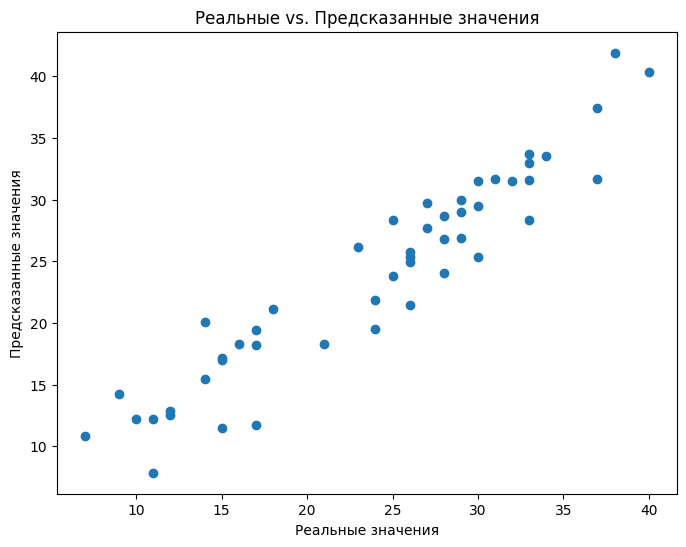

In [ ]:
predicted_values = model.predict(X_train)

plt.figure(figsize=(8, 6))
plt.scatter(y_train, predicted_values)
plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные значения")
plt.title("Реальные vs. Предсказанные значения")
plt.show()

График реальных vs. предсказанных значений показывает, что точки расположены примерно вдоль прямой линии. Это указывает на линейную зависимость между независимыми и зависимой переменной.

**Постоянная дисперсия:**

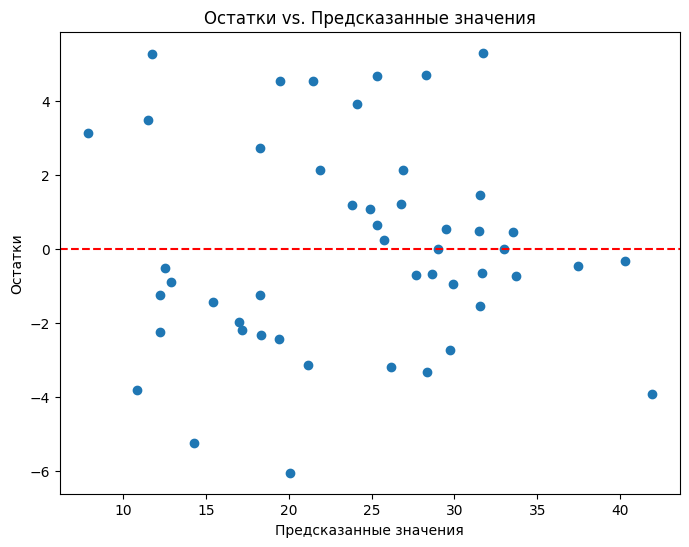

In [ ]:
residuals = y_train - predicted_values

plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("Остатки vs. Предсказанные значения")
plt.show()

График остатков от предсказанных значений не показывает каких-либо систематических закономерностей. Остатки кажутся случайными и распределены равномерно вдоль горизонтальной линии. Это указывает на постоянство дисперсии ошибок и соответствие этому допущению.

**Нормальность остатков:**

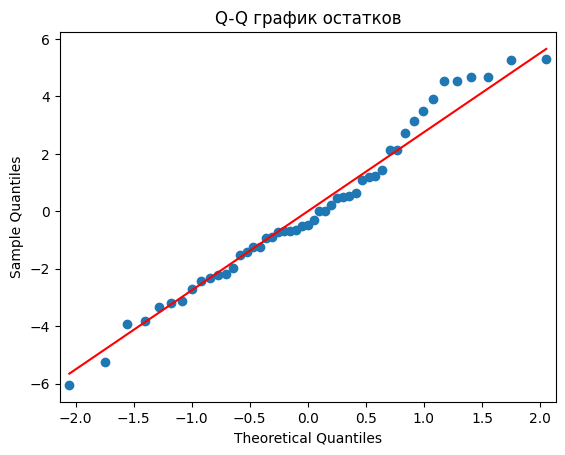

In [ ]:
# Q-Q график остатков
import statsmodels.api as sm

sm.qqplot(residuals, line='s')
plt.title("Q-Q график остатков")
plt.show()

Q-Q график остатков демонстрирует, что большинство точек следуют прямой линии, что свидетельствует о нормальности распределения остатков. Однако, есть некоторые отклонения на краях, что может указывать на наличие некоторых выбросов или нарушение нормальности в хвостах распределения.

Итог: Оценки линейной регрессии удовлетворяют основным допущениям линейной регрессии. Однако, для более точных выводов, дополнительные статистические тесты могли бы быть использованы для дальнейшего подтверждения этих результатов.